In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fake_news_trains.csv', engine ='python', encoding ='latin1', on_bad_lines= 'skip')
df.shape

(24248, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24248 entries, 0 to 24247
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      24162 non-null  object 
 1   title   21915 non-null  object 
 2   author  19624 non-null  object 
 3   text    21087 non-null  object 
 4   label   20718 non-null  float64
dtypes: float64(1), object(4)
memory usage: 947.3+ KB


<Axes: >

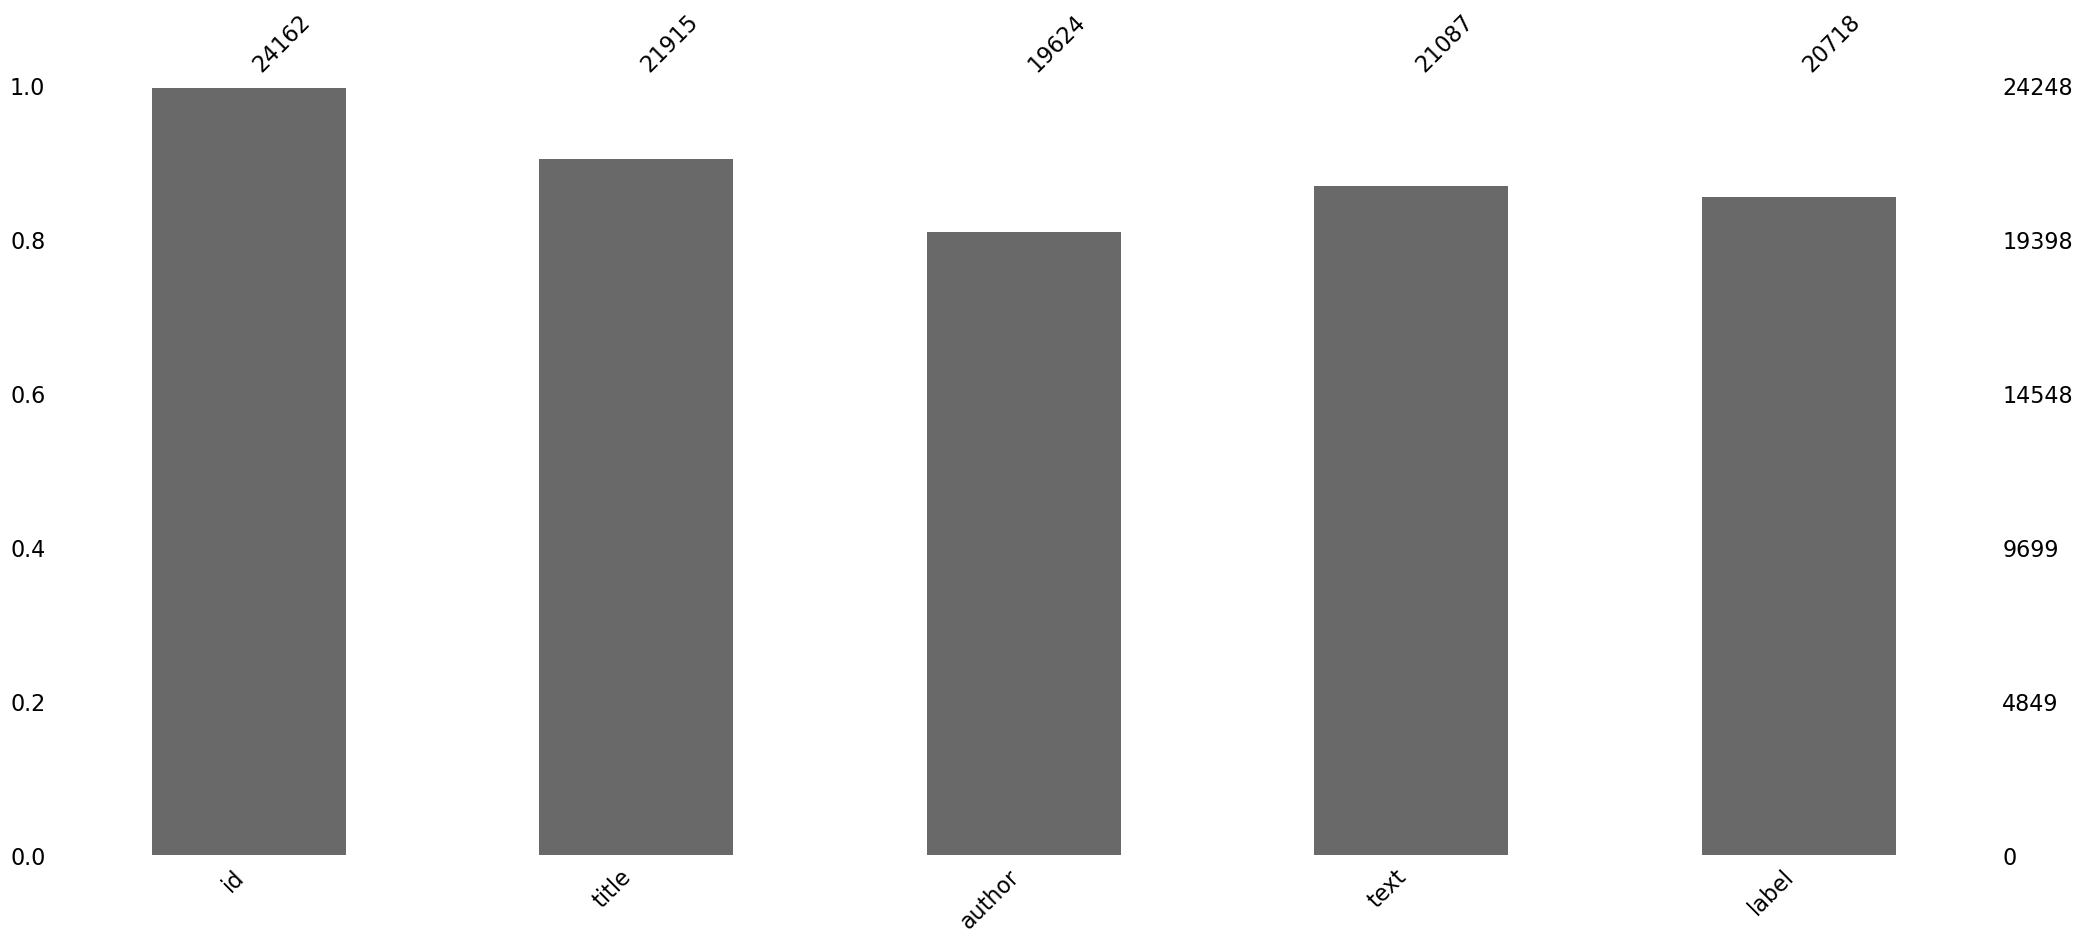

In [4]:
msno.bar(df)

In [5]:
df.dropna(inplace = True)

<Axes: >

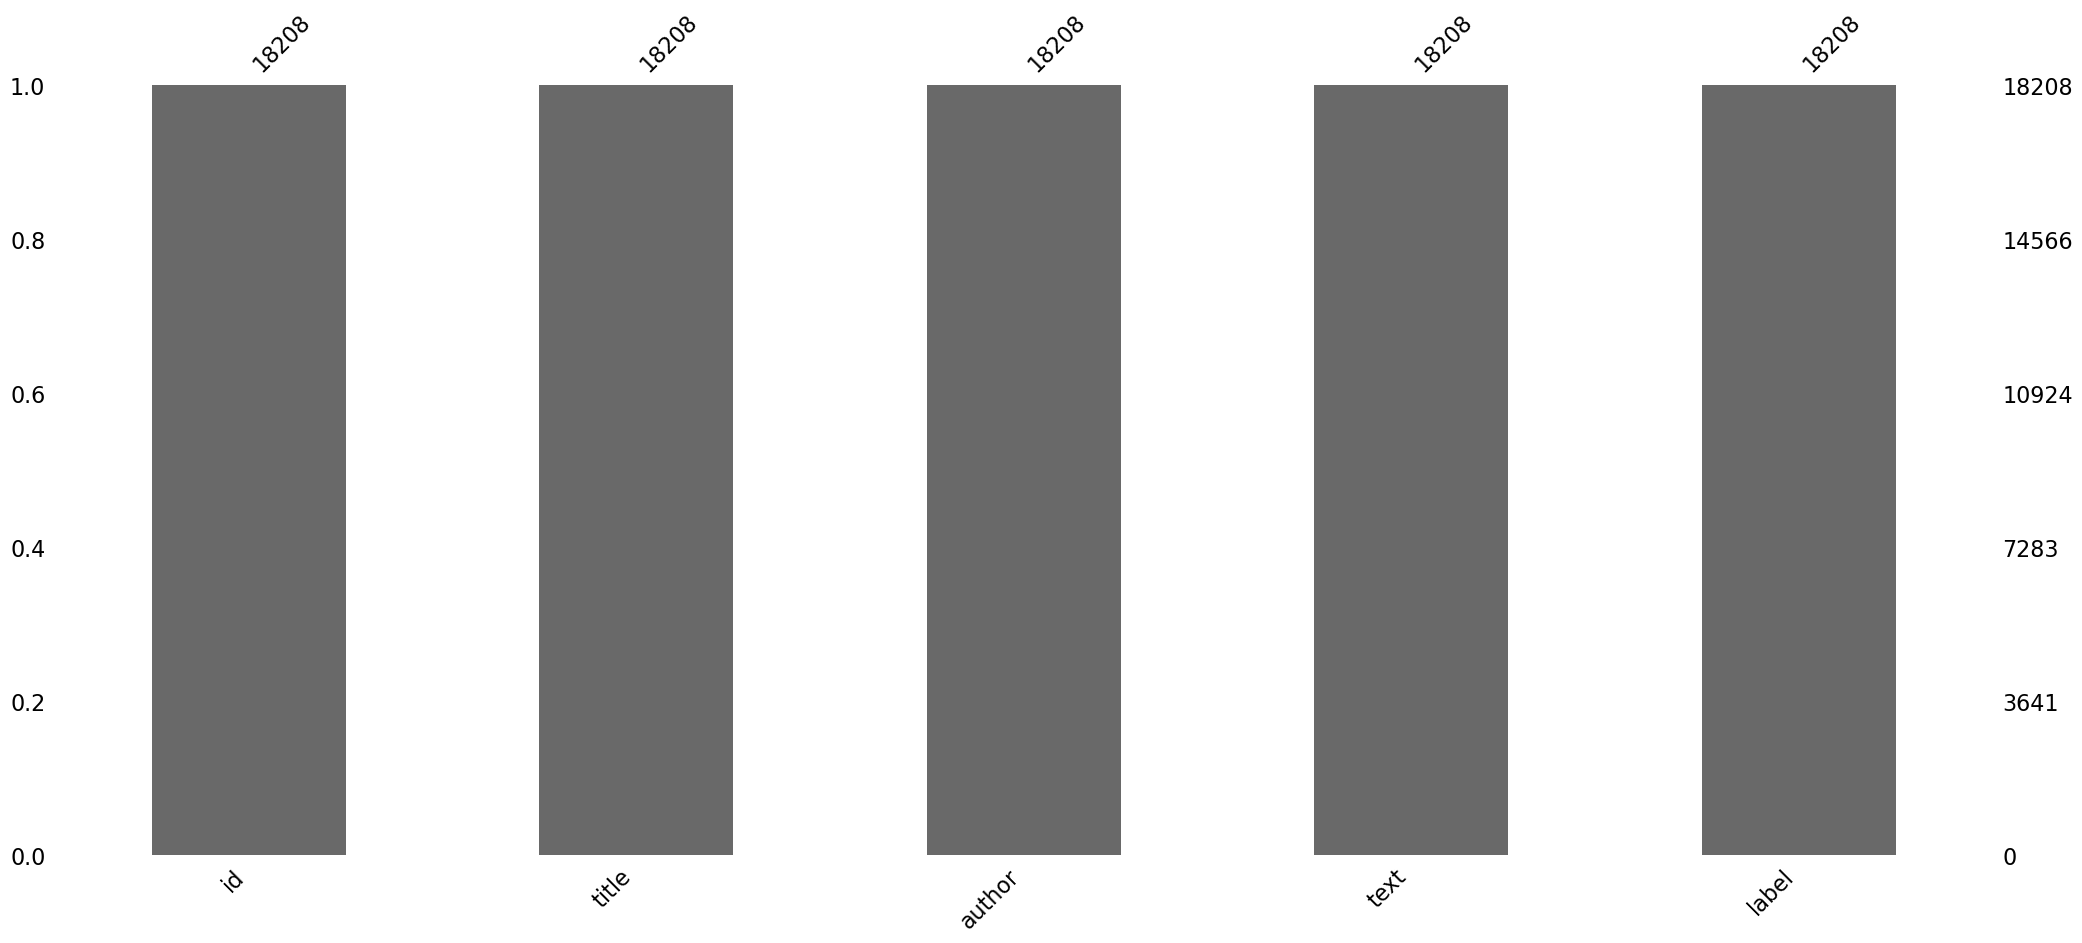

In [6]:
msno.bar(df)

In [7]:
df.reset_index(inplace = True)

In [8]:
df.columns

Index(['index', 'id', 'title', 'author', 'text', 'label'], dtype='object')

In [9]:

df.drop(columns =['id','index'],inplace = True)

In [10]:
df.head()

,title,author,text,label
0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1.0
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0


In [11]:
df['label'] = df['label'].astype(bool)

In [12]:
X = df.drop('label', axis = 1)
y = df['label']

In [13]:
y

0         True
1        False
2         True
3         True
4         True
         ...  
18203    False
18204    False
18205    False
18206     True
18207     True
Name: label, Length: 18208, dtype: bool

In [14]:
X.shape, y.shape

((18208, 3), (18208,))

In [15]:
import tensorflow as tf

In [16]:
tf.__version__

'2.16.1'

In [17]:
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot 

In [18]:
voc_size = 10000

In [19]:
messages = X.copy()

In [20]:
messages

,title,author,text
0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...
18203,Rapper T.I.: Trump a âPoster Child For White...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18204,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18205,Macyâs Is Said to Receive Takeover Approach ...,Michael J. de la Merced and Rachel Abrams,The Macyâs of today grew from the union of s...
18206,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [21]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

for i in range (0,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])  # Remove all characters except letters and replace them with spaces
    review= review.lower()         # Convert the text to lowercase
    review = review.split()        # Split the text into words

    review =[ps.stem(word) for word in review if not word in stopwords.words('english')]  ## Stem the words and remove stopwords
    review = ' '.join(review)
    corpus.append(review)


In [23]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hillari',
 'chuck todd buzzfe donald trump polit favor breitb

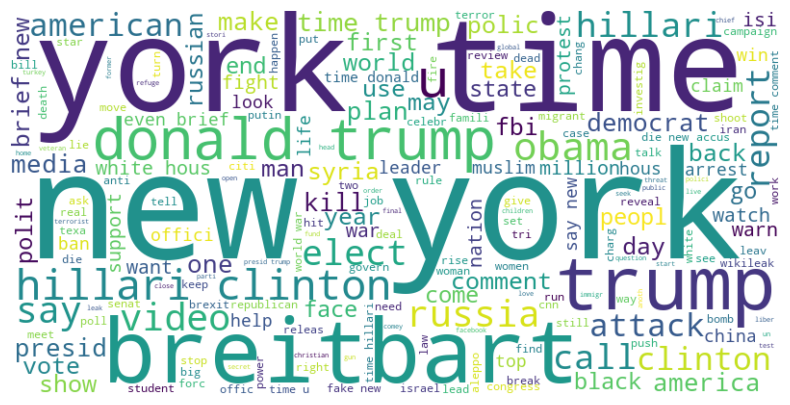

In [24]:
combined_text = ' '.join(corpus)
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [25]:
#Categorical text data into numeric
onehot_rep = [one_hot(words, voc_size) for words in corpus]
onehot_rep

[[8355, 5591, 6825, 5821, 172, 345, 2253, 7793, 5094, 2473],
 [4207, 4515, 2573, 6434, 3780, 4893, 689],
 [3386, 8673, 2868, 3072],
 [505, 4132, 583, 9933, 3967, 9333],
 [6943, 3780, 7745, 3177, 1399, 6774, 3780, 4248, 9189, 6589],
 [5415,
  842,
  5383,
  8824,
  1961,
  939,
  1995,
  5563,
  7387,
  5075,
  6259,
  7377,
  1100,
  126,
  689],
 [3820, 9561, 3161, 2403, 7343, 6441, 3030, 9476, 2220, 2517, 924],
 [3541, 6592, 4140, 9582, 6070, 1364, 939, 5732, 2220, 2517, 924],
 [557, 6303, 4565, 8619, 2465, 8480, 7660, 4478, 939, 5648],
 [8173, 8194, 1070, 1352, 6233, 3788, 7126, 2805],
 [5252, 3125, 1352, 1053, 9473, 2169, 3965, 7674, 3173, 4007, 7821],
 [9933, 2141, 172, 8480, 939, 6070],
 [589, 6260, 1726, 5022, 8136, 2633, 431, 2220, 2517, 924],
 [9030, 7683, 5421, 4241, 123, 2220, 2517, 924],
 [4809, 8909, 5274, 7389, 8867, 9490, 7866, 5520, 9923, 8012],
 [6184, 1493, 4515],
 [5952, 7024, 6643, 2187, 939, 7101, 9256, 689],
 [6820, 7371, 2573, 2050, 893, 5447, 9119, 1546, 6774],


In [26]:
sent_length = 50 
embedded_docs = pad_sequences(onehot_rep, padding = 'pre', maxlen= sent_length) #all sequences have the same length
print(embedded_docs)

[[   0    0    0 ... 7793 5094 2473]
 [   0    0    0 ... 3780 4893  689]
 [   0    0    0 ... 8673 2868 3072]
 ...
 [   0    0    0 ... 2220 2517  924]
 [   0    0    0 ... 4227 7847 6994]
 [   0    0    0 ... 5140 6822 9848]]


In [27]:
embedding_vector_features = 40
model = Sequential()                      #Defines the model as a sequence of layers
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))  #Converts word indices to dense vectors of size 40
model.add(Bidirectional(LSTM(100)))           #Birectional -  Processes input sequences in both directions
model.add(Dense(1, activation = 'sigmoid'))   #Produces the final output for binary classification
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])

model.build(input_shape =(None, sent_length))  #Ensure model is built and the layers are initialized
model.summary()                          #display the correct layer output shapes and parameter counts

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 40)              │         400,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │         112,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513,001 (1.96 MB)

 Trainable params: 513,001 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
len(embedded_docs),y.shape

(18208, (18208,))

In [29]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [30]:
X_final.shape, y_final.shape

((18208, 50), (18208,))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 42)

In [32]:
model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 10 , batch_size =64)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 96s 339ms/step - accuracy: 0.7661 - loss: 0.4391 - val_accuracy: 0.9244 - val_loss: 0.1756
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 67s 334ms/step - accuracy: 0.9459 - loss: 0.1357 - val_accuracy: 0.9235 - val_loss: 0.1771
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 68s 339ms/step - accuracy: 0.9725 - loss: 0.0874 - val_accuracy: 0.9257 - val_loss: 0.1985
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 61s 304ms/step - accuracy: 0.9840 - loss: 0.0515 - val_accuracy: 0.9233 - val_loss: 0.2070
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 59s 296ms/step - accuracy: 0.9916 - loss: 0.0333 - val_accuracy: 0.9249 - val_loss: 0.2494
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 83s 302ms/step - accuracy: 0.9939 - loss: 0.0226 - val_accuracy: 0.9220 - val_loss: 0.3006
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 65s 323ms/step - accuracy: 0.9958 - loss: 0.0144 - val_accuracy: 0.9213 - val_loss: 0.3626
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.9978 - loss: 0

In [33]:
y_pred = model.predict(X_test)

171/171 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step


In [34]:
y_pred = np.where(y_pred>0.5,1,0)

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9207395204100312


In [36]:
from sklearn.metrics import confusion_matrix, classification_report 

In [37]:
print(confusion_matrix(y_test, y_pred))

[[2803  314]
 [ 119 2227]]


In [38]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.90      0.93      3117
        True       0.88      0.95      0.91      2346

    accuracy                           0.92      5463
   macro avg       0.92      0.92      0.92      5463
weighted avg       0.92      0.92      0.92      5463

